In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from scipy.interpolate import spline, interp1d

def MakeSmooth(x, y):
    x_arr = np.array(x)
    xnew = np.linspace(x_arr.min(), x_arr.max(), num=8000, endpoint=True)
    f2 = interp1d(x, y, kind='cubic')
    return xnew, f2(xnew)

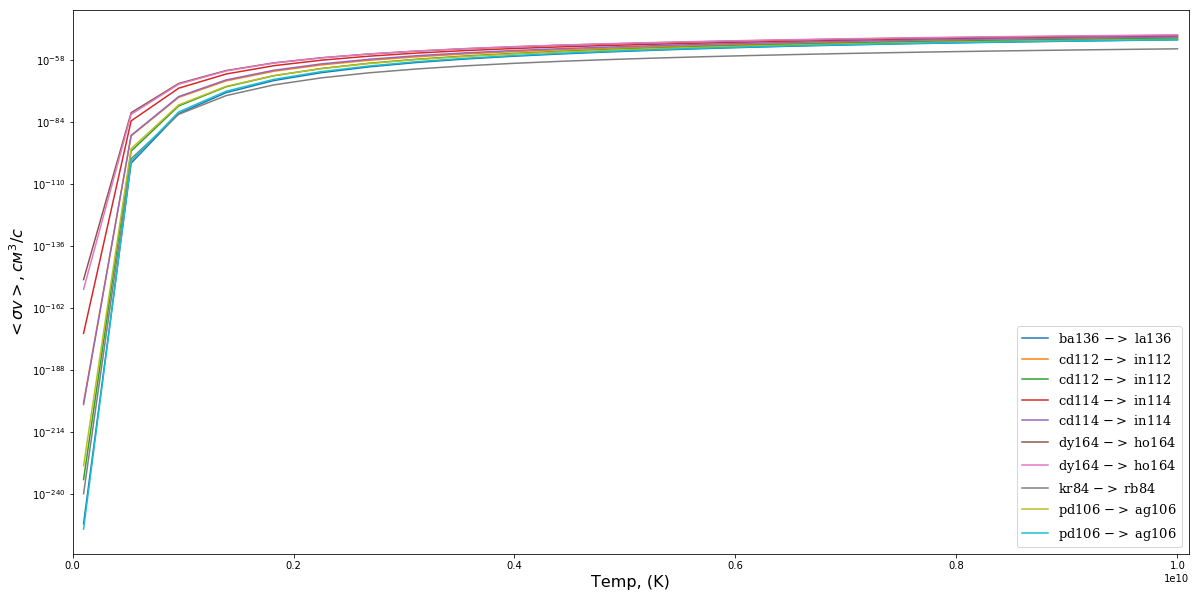

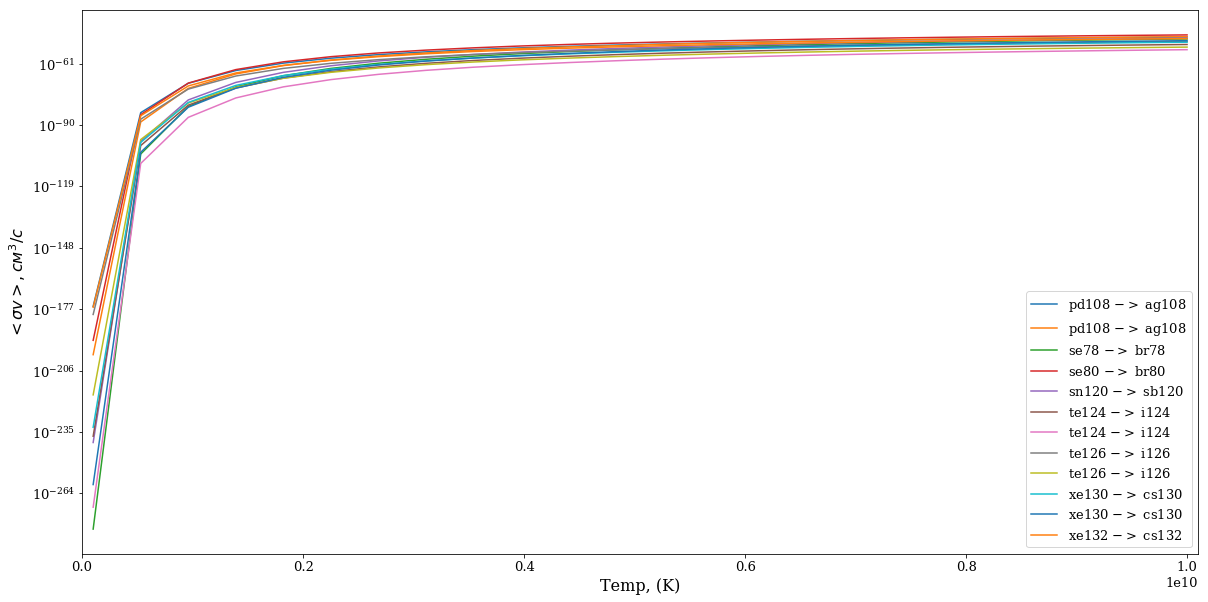

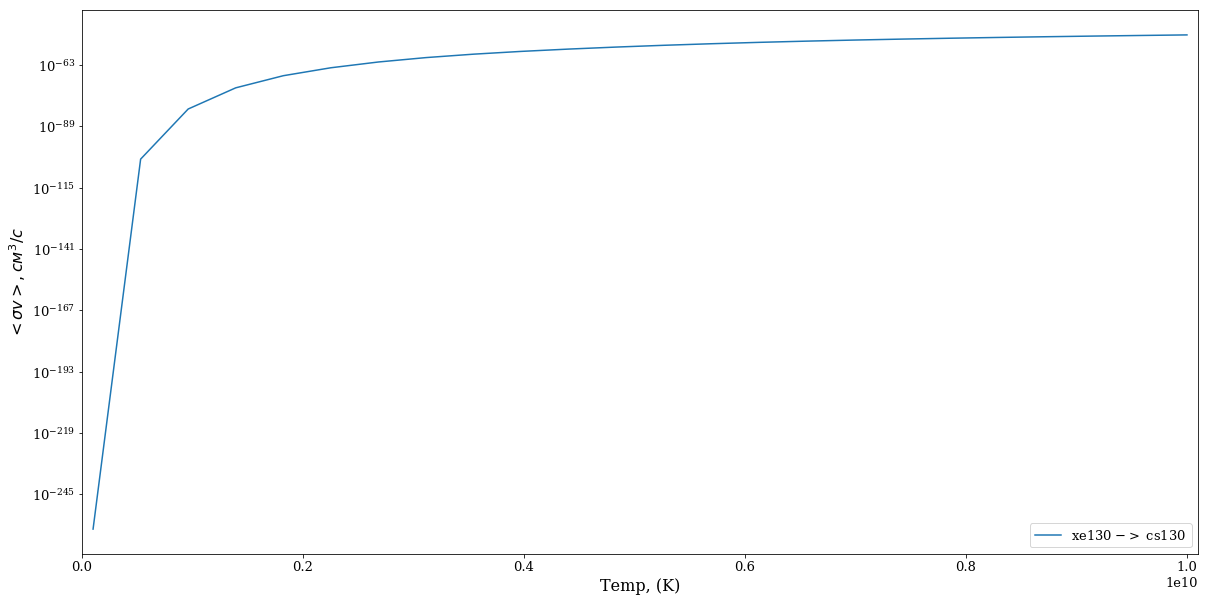

In [2]:
def Read_Two_Column_File(file_name):
    with open(file_name, 'r') as data:
        x = []
        y = []
        for line in data:
            p = line.split()
            x.append(float(p[0]))
            y.append(abs(float(p[1])))
    names = os.path.splitext(os.path.basename(file_name))[0].rsplit('-')
    return x, y, names

onlyfiles = [f for f in os.listdir('out-sig') if os.path.isfile(os.path.join('out-sig', f))]

fig, ax = plt.subplots(figsize=(20,10))
plt.rc('font', family='serif', size=13)
lines = []

for file_index in range(0, 10):
    x, y, names = Read_Two_Column_File('out-sig/' + onlyfiles[file_index])
    plt.rc('font', family='serif', size=13)
    x_new, y_new = x, y
    line1, = ax.plot(x_new, y_new, label='{0} $->$ {1}'.format(names[0], names[1]))        
    lines.append(line1)
    
ax.legend(handles=lines, loc=4)

plt.xlabel('Temp, (K)',fontsize=16)
plt.ylabel('$<\sigma v>, см^3/с$',fontsize=16)
plt.xlim(1e8 - 100000000, 1e10 + 100000000)
ax.set_yscale('log')

fig.savefig("out-plot/sigma-full.png")
plt.show()

######## 2

fig, ax = plt.subplots(figsize=(20,10))
plt.rc('font', family='serif', size=13)
lines = []

for file_index in range(10, len(onlyfiles)):
    x, y, names = Read_Two_Column_File('out-sig/' + onlyfiles[file_index])
    plt.rc('font', family='serif', size=13)
    line1, = ax.plot(x, y, label='{0} $->$ {1}'.format(names[0], names[1]))        
    lines.append(line1)
    
ax.legend(handles=lines, loc=4)

plt.xlabel('Temp, (K)',fontsize=16)
plt.ylabel('$<\sigma v>, см^3/с$',fontsize=16)
plt.xlim(1e8 - 100000000, 1e10 + 100000000)
ax.set_yscale('log')

fig.savefig("out-plot/sigma-full-2.png")
plt.show()

######## 3 
fig, ax = plt.subplots(figsize=(20,10))
plt.rc('font', family='serif', size=13)
lines = []


x, y, names = Read_Two_Column_File('out-sig/xe130-cs130.txt')
plt.rc('font', family='serif', size=13)
line1, = ax.plot(x, y, label='{0} $->$ {1}'.format(names[0], names[1]))        
lines.append(line1)
    
ax.legend(handles=lines, loc=4)

plt.xlabel('Temp, (K)',fontsize=16)
plt.ylabel('$<\sigma v>, см^3/с$',fontsize=16)
plt.xlim(1e8 - 100000000, 1e10 + 100000000)
ax.set_yscale('log')

fig.savefig("out-plot/xe130-cs130.png")
plt.show()

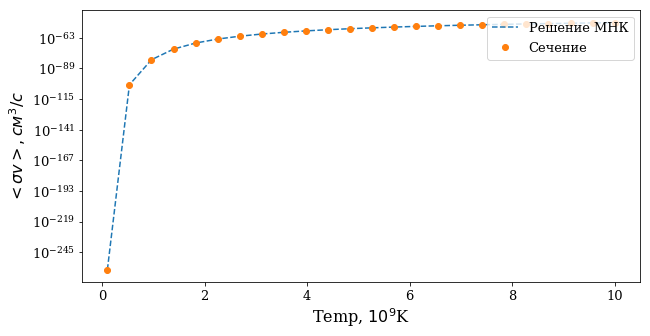

In [3]:
def write_solution(filename ,multiply):
    with open(filename) as f:
        content = f.readlines()

    content = [x.strip() for x in content]

    t_array = []
    sig_array = []

    for index in range(0, len(content)):
        splitted = content[index].rsplit(' ')
        t_array.append(float(splitted[0])/1e9)
        val = float(splitted[1]) * multiply
        if (val > 0):
            sig_array.append(np.log(val))
        else:
            sig_array.append(np.log(np.abs(val)))
        

    def build_a(t_arr):
        if isinstance(t_arr, list):
            if len(t_arr) >= 7:
                a = []
                for index in range(len(t_arr)):
                    t = t_arr[index]
                    a.append([1, t**(-1), t**(-1.0/3), t**(1.0/3), t, t**(5.0/3), np.log(t)])
                return a
            else:
                pass
        else:
            pass

    a = build_a(t_array)
    b = sig_array

    x = []; y = []
    
    def plot_solution(t_array, solution, block):
        if (block != True):
            block = False
        a1_array = []; b1_array = []
        for t_index in range(0, len(t_array)):
            current_a1 = 0
            for a_index in range(0, len(solution)):
                current_a1 += solution[a_index] * a[t_index][a_index]
            a1_array.append(np.exp(current_a1))
            b1_array.append(np.exp(b[t_index]))
            
        fig, ax = plt.subplots(figsize=(10,5))

        plt.rc('font', family='serif', size=13)
        line1, = ax.plot(t_array, a1_array, label="Решение МНК", linestyle="--")        
        line2, = plt.plot(t_array, b1_array, 'o', label="Сечение")    
        
        ax.legend(handles=[line1, line2], loc=1)
        plt.xlabel('Temp, $10^{9}$K',fontsize=16)
        plt.ylabel('$<\sigma v>, см^3/с$',fontsize=16)
        ax.set_yscale('log')

        fig.savefig("out-plot/compare-xe130-cs130.png")
        plt.show()  
        return b1_array

    x_lstsq_full, _, _, _ =np.linalg.lstsq(a, b, rcond=1)
    return plot_solution(t_array, x_lstsq_full, False)
y2 = write_solution('out-sig/xe130-cs130.txt', 1)

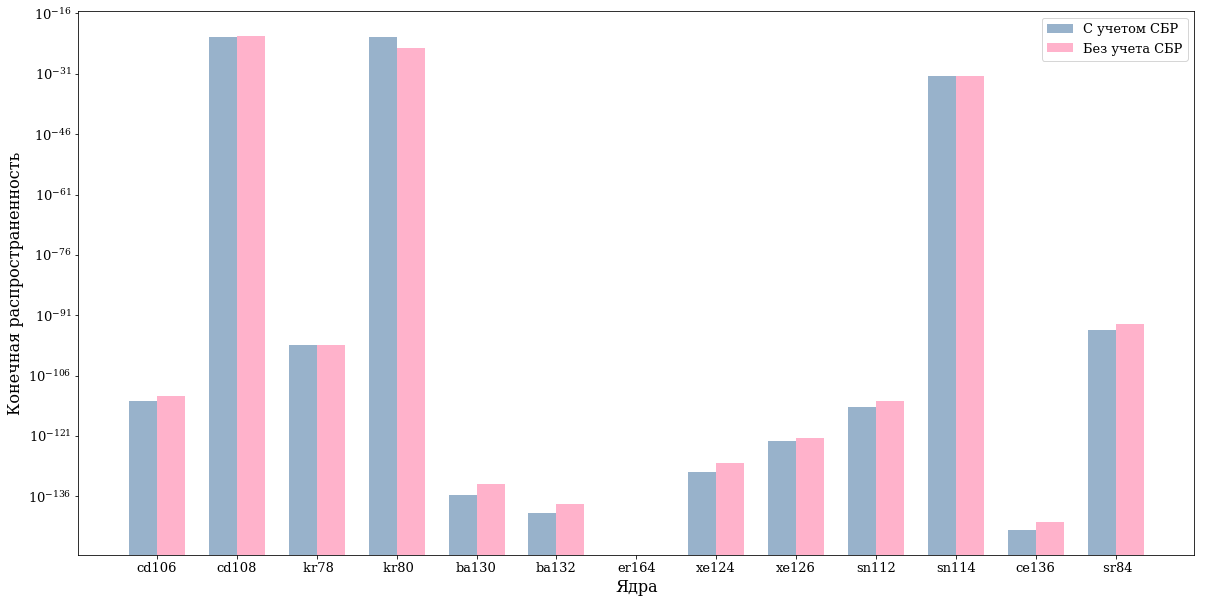

In [79]:
def Read_Three_Column_File(file_name, from_n, to_n):
    with open(file_name, 'r') as data:
        my = []
        w_my = []
        l = []
        err = []
        for line in data:
            p = line.split(', ')
            my_curr = float(p[1])
            w_my_curr = float(p[2])
            if (my_curr != 0):
                err_curr = ( w_my_curr - my_curr ) / my_curr
            else:
                err_curr = 0
            
            l.append(p[0])
            my.append(my_curr)
            w_my.append(w_my_curr)
            err.append(err_curr)
            
    if ((from_n is not None) and (to_n is not None)):
        my = my[from_n:to_n]
        w_my = w_my[from_n:to_n]
        l = l[from_n:to_n]
        err = err[from_n:to_n]
    return my, w_my, l, err

my,w_my,l, err = Read_Three_Column_File('outcome.1', None, None)

fig, ax = plt.subplots(figsize=(20,10))

x = np.arange(len(l))
width = 0.35
plt.rc('font', family='serif', size=13)
line1 = ax.bar(x - width/2, my, width, label="С учетом СБР", linestyle="--", color=(0.2, 0.4, 0.6, 0.5))        
line2 = plt.bar(x + width/2, w_my, width, label="Без учета СБР", color=(1, 0.4, 0.6, 0.5))    
plt.xticks(x, l)
ax.legend(handles=[line1, line2], loc=1)
plt.xlabel('Ядра',fontsize=16)
plt.ylabel('Конечная распространенность',fontsize=16)
ax.set_yscale('log')

fig.savefig("out-plot/result.png")
plt.show()  

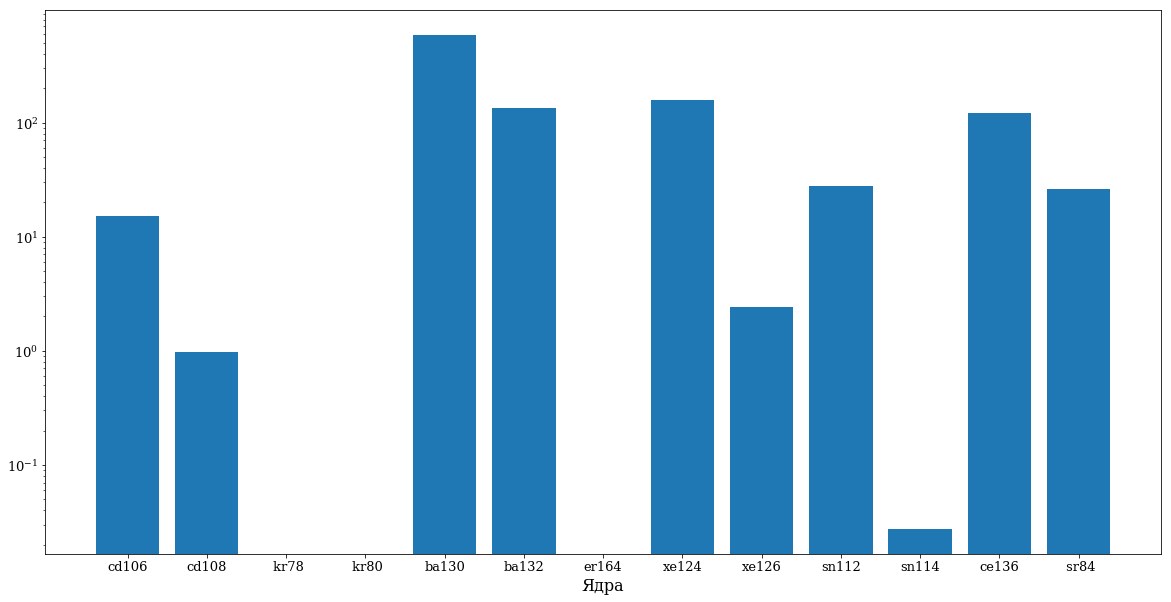

In [31]:
def Read_Three_Column_File(file_name, from_n, to_n):
    with open(file_name, 'r') as data:
        my = []
        w_my = []
        l = []
        err = []
        for line in data:
            p = line.split(', ')
            my_curr = float(p[1])
            w_my_curr = float(p[2])
            if (my_curr != 0):
                err_curr = ( w_my_curr - my_curr ) / my_curr
            else:
                err_curr = 0
            
            l.append(p[0])
            my.append(my_curr)
            w_my.append(w_my_curr)
            err.append(err_curr)
            
    if ((from_n is not None) and (to_n is not None)):
        my = my[from_n:to_n]
        w_my = w_my[from_n:to_n]
        l = l[from_n:to_n]
        err = err[from_n:to_n]
    return my, w_my, l, err

my,w_my,l, err = Read_Three_Column_File('outcome.1', None, None)

fig, ax = plt.subplots(figsize=(20,10))

x = np.arange(len(l))

plt.rc('font', family='serif', size=14)
line1 = ax.bar(x, err, label="Относительная ошибка", linestyle="--")      
plt.xticks(x, l)
plt.xlabel('Ядра',fontsize=16)
plt.ylabel('',fontsize=16)
ax.set_yscale('log')

fig.savefig("out-plot/result-err.png")
plt.show()  

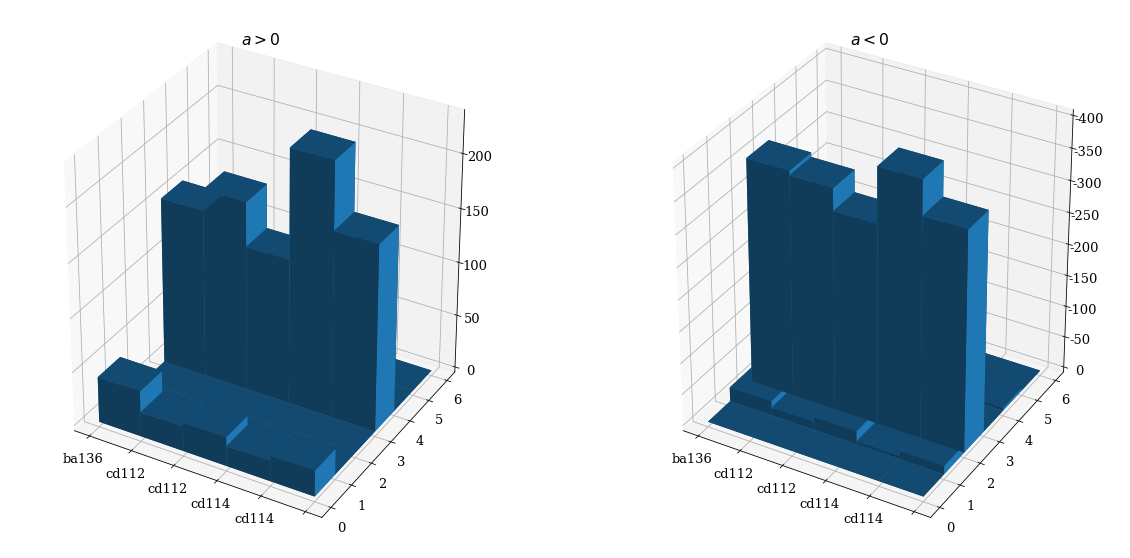

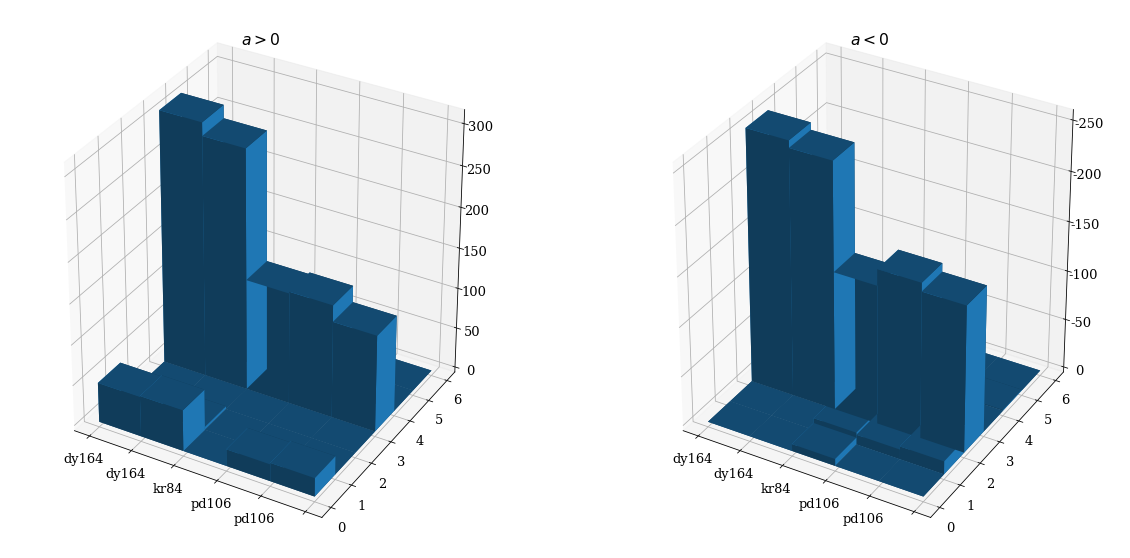

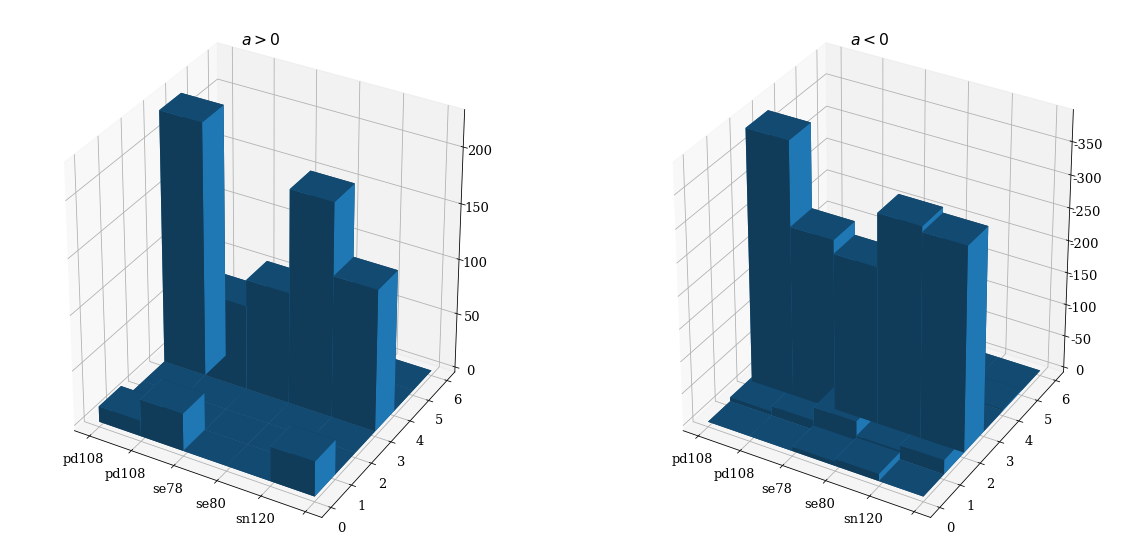

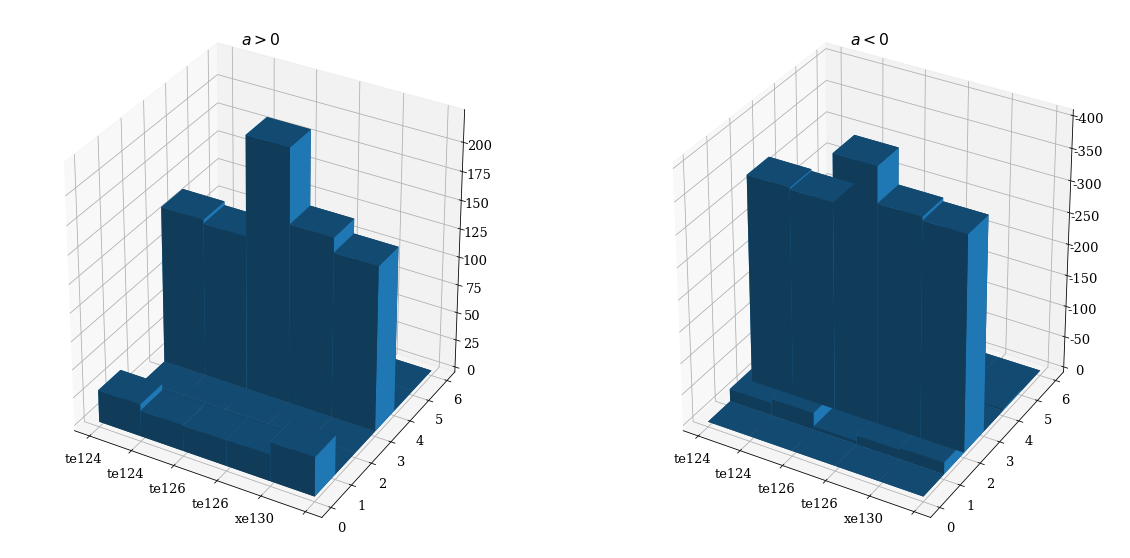

In [8]:
def write_solution(filename ,multiply):
    with open(filename) as f:
        content = f.readlines()

    content = [x.strip() for x in content]

    t_array = []
    sig_array = []

    for index in range(0, len(content)):
        splitted = content[index].rsplit(' ')
        t_array.append(float(splitted[0])/1e9)
        val = float(splitted[1]) * multiply
        if (val > 0):
            sig_array.append(np.log(val))
        else:
            sig_array.append(np.log(np.abs(val)))
        

    def build_a(t_arr):
        if isinstance(t_arr, list):
            if len(t_arr) >= 7:
                a = []
                for index in range(len(t_arr)):
                    t = t_arr[index]
                    a.append([1, t**(-1), t**(-1.0/3), t**(1.0/3), t, t**(5.0/3), np.log(t)])
                return a
            else:
                pass
        else:
            pass

    a = build_a(t_array)
    b = sig_array

    x = []; y = []
    x_lstsq_full, _, _, _ =np.linalg.lstsq(a, b, rcond=1)

    names = os.path.splitext(os.path.basename(filename))[0].rsplit('-')
    
    return names[0], x_lstsq_full
    
onlyfiles = [f for f in os.listdir('out-sig') if os.path.isfile(os.path.join('out-sig', f))]


def PrintFigure(fr, to, fileName):
    names_arr = []
    params_arr = []
    for file_index in range(fr, to):
        name, params = write_solution('out-sig/' + onlyfiles[file_index], 1)
        names_arr.append(name)
        params_arr.append(params)

    #print(names_arr)
    #print(params_arr)

    # setup the figure and axes
    fig = plt.figure(figsize=(20, 10))
    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122, projection='3d')

    # fake data
    _x = range(0,len(names_arr))
    _y = range(0,6)
    _xx, _yy = np.meshgrid(_x, _y)
    x, y = _xx.ravel(), _yy.ravel()
    z = []

    for index in range(len(x)):
        temp_x = x[index]
        temp_y = y[index]
        index_in_names = temp_x
        if (params_arr[index_in_names][temp_y] > 0):        
            z.append(params_arr[index_in_names][temp_y])
        else:
            z.append(0)

    top = z
    bottom =  np.zeros_like(z) #np.multiply(z, -1)#
    width = depth = 1

    ax1.bar3d(x, y, bottom, width, depth, top, shade=True)
    x, y = _xx.ravel(), _yy.ravel()
    z = []

    for index in range(len(x)):
        temp_x = x[index]
        temp_y = y[index]
        index_in_names = temp_x
        if (params_arr[index_in_names][temp_y] < 0):        
            z.append(params_arr[index_in_names][temp_y])
        else:
            z.append(0)

    top = np.multiply(z, -1)#np.zeros_like(z)
    bottom =  np.zeros_like(z)#z
    width = depth = 1

    ax2.bar3d(x, y, bottom, width, depth, top, shade=True)
    ax1.set_xticklabels( names_arr )
    ax2.set_xticklabels( names_arr )
    ax2.set_zticklabels( range(0, -500, -50) )
    ax1.set_title('$a > 0$')
    ax2.set_title('$a < 0$')

    fig.savefig(fileName)
    plt.show()

PrintFigure(0, 5, "out-plot/a-1.png")
PrintFigure(5, 10, "out-plot/a-2.png")
PrintFigure(10, 15, "out-plot/a-3.png")
PrintFigure(15, 20, "out-plot/a-4.png")